In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-stock-data-2025/apple_stock.csv


# Understanding & Analyzing Data

In [2]:
df = pd.read_csv('/kaggle/input/apple-stock-data-2025/apple_stock.csv')
df.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [3]:
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

print(df.columns)

Index(['date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.set_index('date', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11107 entries, 1980-12-12 to 2025-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  11107 non-null  float64
 1   Close      11107 non-null  float64
 2   High       11107 non-null  float64
 3   Low        11107 non-null  float64
 4   Open       11107 non-null  float64
 5   Volume     11107 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 607.4 KB


In [6]:
df.nunique()

date         11107
Adj Close     8097
Close         6520
High          6356
Low           6344
Open          6410
Volume       10543
dtype: int64

In [31]:
df['High'].describe()

count    11107.000000
mean        24.598169
std         50.691902
min          0.049665
25%          0.306362
50%          0.553393
75%         21.569285
max        260.100006
Name: High, dtype: float64

In [7]:
df['Adj Close'].describe()

count    11107.000000
mean        23.522229
std         49.767881
min          0.037815
25%          0.243402
50%          0.446682
75%         18.260086
max        259.019989
Name: Adj Close, dtype: float64

In [8]:
df['Volume'].describe()

count    1.110700e+04
mean     3.154341e+08
std      3.348735e+08
min      0.000000e+00
25%      1.111164e+08
50%      2.036944e+08
75%      3.960418e+08
max      7.421641e+09
Name: Volume, dtype: float64

# Trend Analysis

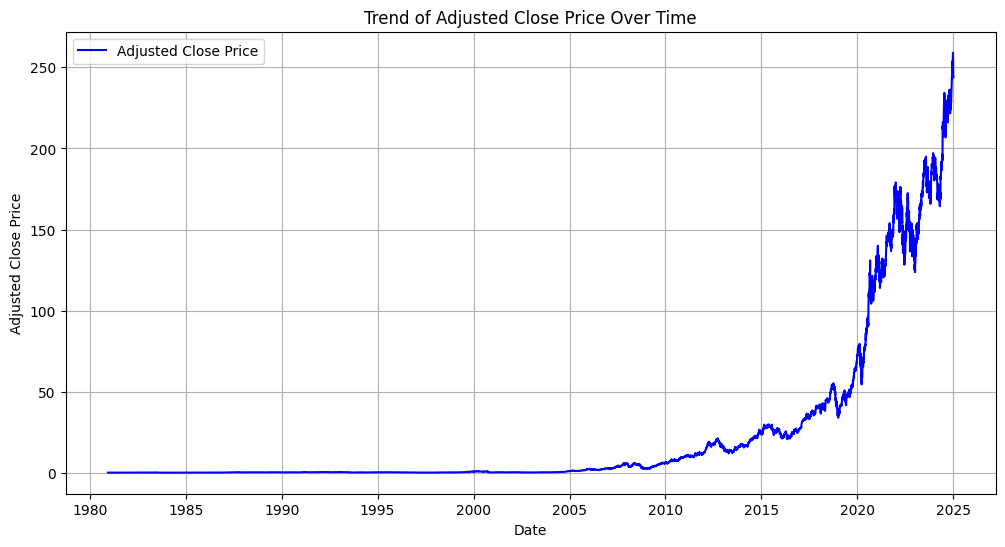

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title('Trend of Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()
plt.show()

# Volatility Analysis

In [21]:
df['daily_change'] = df['Adj Close'].pct_change() * 100

print(df[['Adj Close', 'daily_change']].head())

            Adj Close  daily_change
date                               
1980-12-12   0.098834           NaN
1980-12-15   0.093678     -5.217063
1980-12-16   0.086802     -7.339813
1980-12-17   0.088951      2.475121
1980-12-18   0.091530      2.899232


In [17]:
df['volatility_30d'] = df['daily_change'].rolling(window=30).std()

print(df[['volatility_30d']].tail())

            volatility_30d
date                      
2024-12-27        0.919040
2024-12-30        0.954634
2024-12-31        0.918069
2025-01-02        1.048274
2025-01-03        1.048883


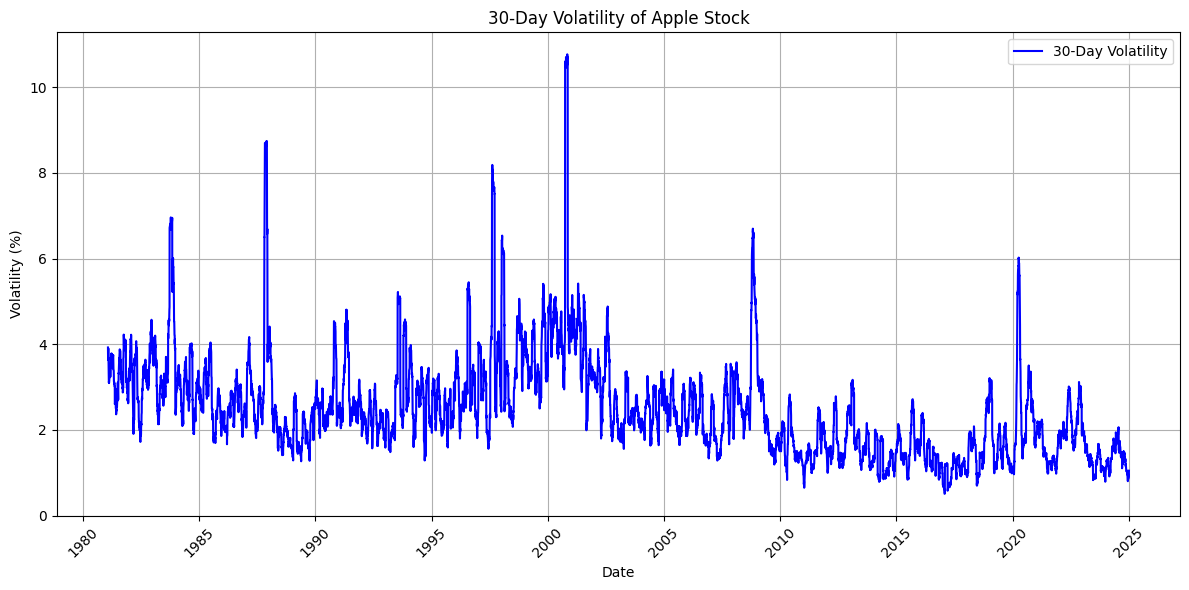

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['volatility_30d'], label='30-Day Volatility', color='blue')
plt.title('30-Day Volatility of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price Prediction and Forecasting

In [7]:
df = df.sort_index()

In [8]:
print(df.head())

            Adj Close     Close      High       Low      Open     Volume
date                                                                    
1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600


In [9]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [10]:
from statsmodels.tsa.arima.model import ARIMA

data = df['Adj Close']

In [11]:
train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]

model = ARIMA(train_data, order=(5, 1, 0))  # (p, d, q) - contoh: (5, 1, 0)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

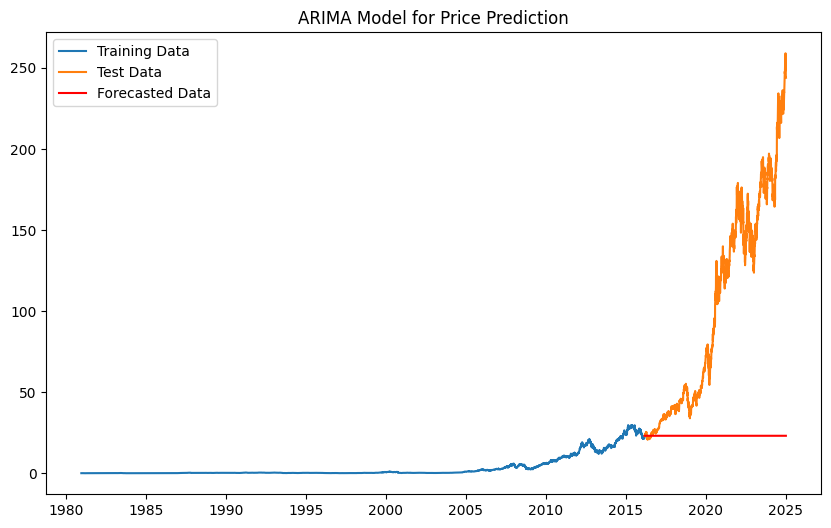

In [12]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecasted Data', color='red')
plt.title('ARIMA Model for Price Prediction')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 103.24915094139337


In [14]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


07:47:55 - cmdstanpy - INFO - Chain [1] start processing
07:48:02 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


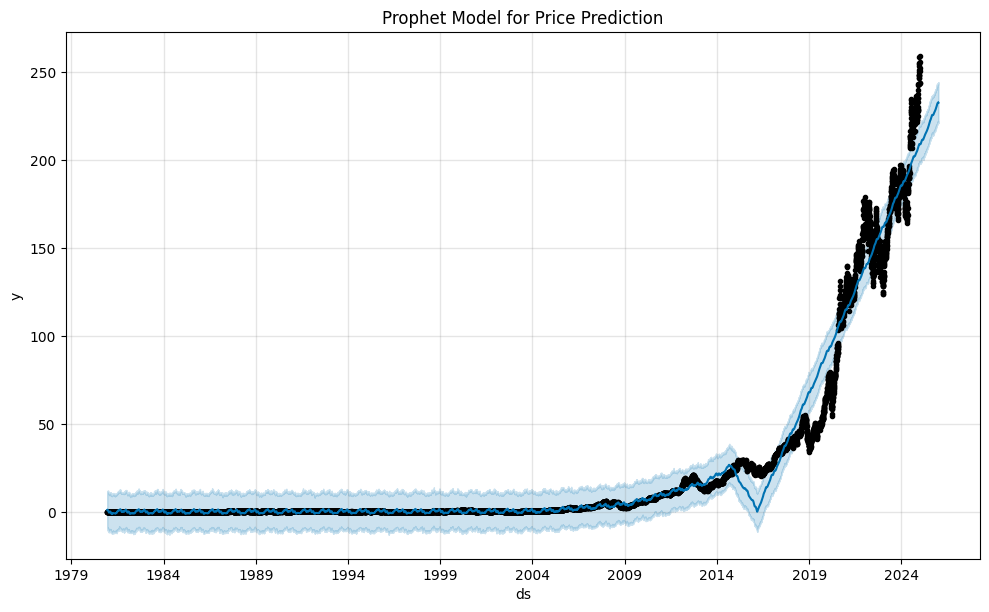

In [15]:
from prophet import Prophet

df = df.reset_index()

prophet_data = df[['date', 'Adj Close']].rename(columns={'date': 'ds', 'Adj Close': 'y'})

model = Prophet()
model.fit(prophet_data)

future = model.make_future_dataframe(periods=365)  # Prediksi selama 365 hari ke depan

forecast = model.predict(future)

model.plot(forecast)
plt.title('Prophet Model for Price Prediction')
plt.show()

# Trading Volume Analysis

In [16]:
volume_stats = df['Volume'].describe()
print(volume_stats)

count    1.110700e+04
mean     3.154341e+08
std      3.348735e+08
min      0.000000e+00
25%      1.111164e+08
50%      2.036944e+08
75%      3.960418e+08
max      7.421641e+09
Name: Volume, dtype: float64


In [19]:
df.set_index('date', inplace=True)

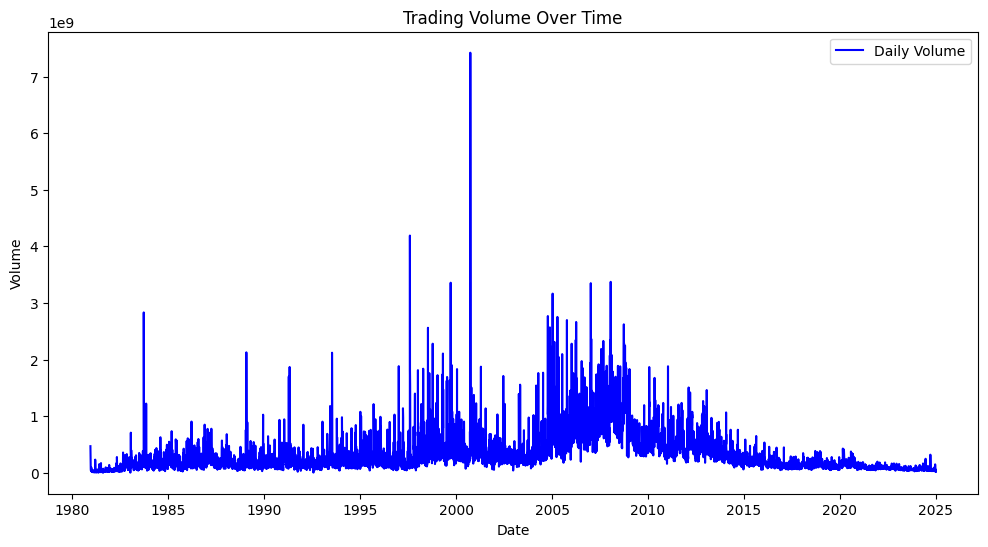

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Daily Volume', color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [24]:
threshold = df['Volume'].quantile(0.95)

high_volume_days = df[df['Volume'] > threshold]
print(high_volume_days[['Volume']])

                Volume
date                  
1983-09-23  2832345600
1983-11-08  1221516800
1989-01-27  2127171200
1989-12-12  1025416000
1991-04-15  1700384000
...                ...
2012-12-14  1009579200
2013-01-24  1460852400
2013-01-25  1208026400
2013-04-24   969651200
2014-01-28  1065523200

[556 rows x 1 columns]


In [26]:
correlation = df['Volume'].corr(df['Adj Close'])
print(f"Correlation between Volume and Adj Close: {correlation:.2f}")

Correlation between Volume and Adj Close: -0.27


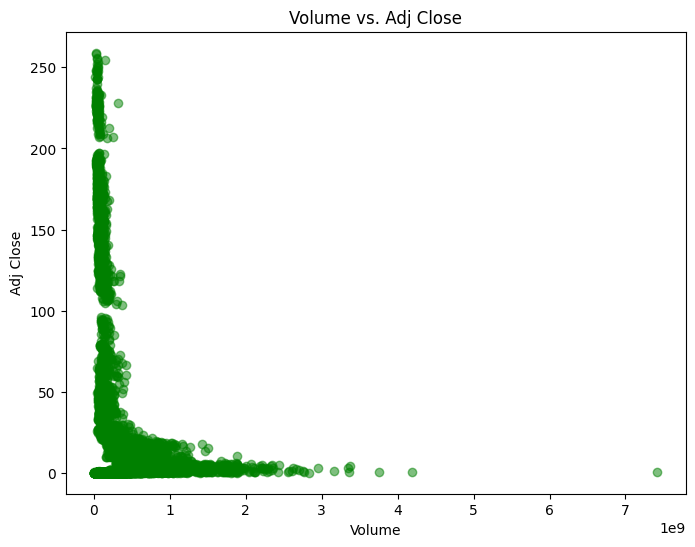

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Volume'], df['Adj Close'], alpha=0.5, color='green')
plt.title('Volume vs. Adj Close')
plt.xlabel('Volume')
plt.ylabel('Adj Close')
plt.show()